UCI Machine Learning Repository to predict whether or not a patient has heart disease:

In [ ]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # to draw a confusion matrix

In [ ]:
## since we have already downloaded the data to a file, we can load the file...
#df = pd. read_csv('processed.cleveland.data',
#header=None)
## however, it's also possible to download the data directly from UCI...
df = pd. read_csv ('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',header=None)

In [ ]:
## print first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- age,
- sex,
- cp, chest pain
- restbp, resting blood pressure (in mm Hg)
- chol, serum cholesterol in mg/dl
- fbs, fasting blood sugar
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induced angina
- oldpeak, ST depression induced by exercise relative to rest
- slope, the slope of the peak exercise ST segment.
- ca, number of major vessels (0-3) colored by fluoroscopy
.thal, this is short of thalium heart scan.
- hd, diagnosis of heart disease, the predicted attribute

In [ ]:
## change the column numbers to column names
df.columns= ['age',
'sex',
'cp',
'restbp',
'chol',
'fbs',
'restecg',
'thalach',
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'hd']
## print the first 5 rows (including the column names)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Find and Remove Missing Data

In [ ]:
#dtypes tells us "data types" for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [ ]:
#print out unique values in the column called 'ca'
#"?" repracent missing values
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
## print the number of rows that contain missing values.
##
## loc [], short for "location", let's us specify which rows we want...
## and so we say we want any row with '?' in column 'ca'
## OR
## any row with '?' in column 'thal'
## len(), short for "length", prints out the number of rows.
len (df.loc [ (df['ca'] == '?')|(df ['thal'] == '?')])

6

In [ ]:
df.loc [ (df['ca'] == '?')|(df ['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)

303

In [ ]:
## use loc[] to select all rows that do not contain missing values
## and save them in a new dataframe called "df_no_missing"
df_no_missing= df.loc [(df ['ca'] != '?') & (df ['thal'] != '?')]

In [ ]:
len(df_no_missing)

297

In [ ]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

## Classification_Trees

In [ ]:
## Make a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1). copy() # alternatively: X = df_no_missing.iloc [:,:-1]
X. head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y = df_no_missing['hd']. copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## one-hot Encoding

In [ ]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [ ]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [ ]:
## For this tutorial, we will use get_dummies () to do One-Hot Encoding,
## but just know that there are other options.
pd.get_dummies (X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
X_encoded = pd.get_dummies(X, columns=['cp',
'restecg',
'slope',
'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_index = y> 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1 # set each non-zero value in y to 1
y.unique() # verify that y only contains and 1.

array([0, 1])

In [ ]:
## split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split (X_encoded, y, random_state=42)
## create a decisiont tree and fit it to the training data
clf_dt = DecisionTreeClassifier (random_state=42)
clf_dt = clf_dt. fit (X_train, y_train)

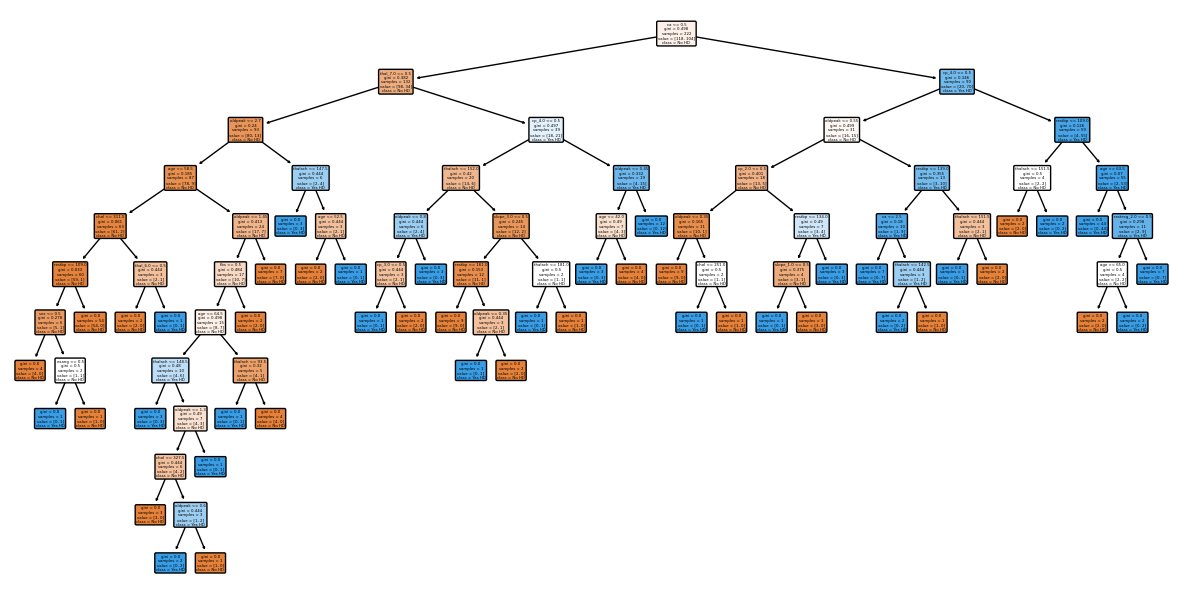

In [ ]:
## NOTE: We can plot the tree and it is huge!
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns.tolist());  # Convert Index to list using tolist()


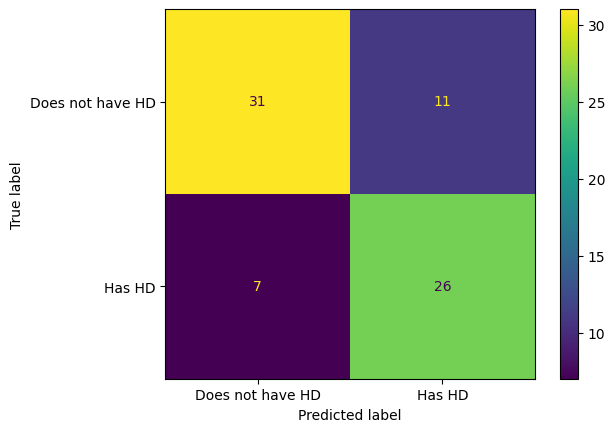

In [ ]:
## plot_confusion_matrix() will run the test data down the tree and draw
## a confusion matrix.
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already trained your classifier 'clf_dt' and made predictions on test data.
y_pred = clf_dt.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])
disp.plot()


In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf_dt . fit(X_train, y_train)
  clf_dts.append(clf_dt)

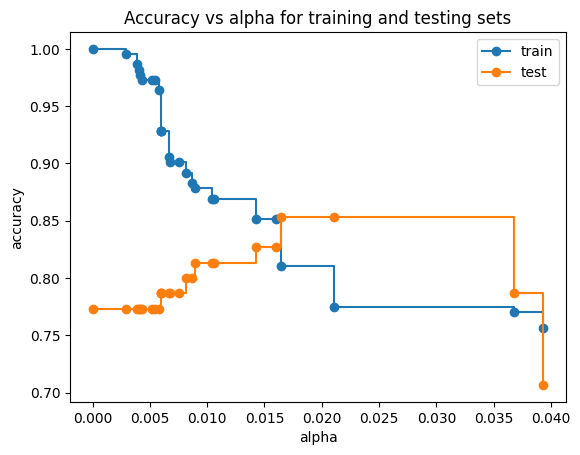

In [ ]:
# Calculate the training and testing scores for each classifier in clf_dts
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

# Plot the results
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

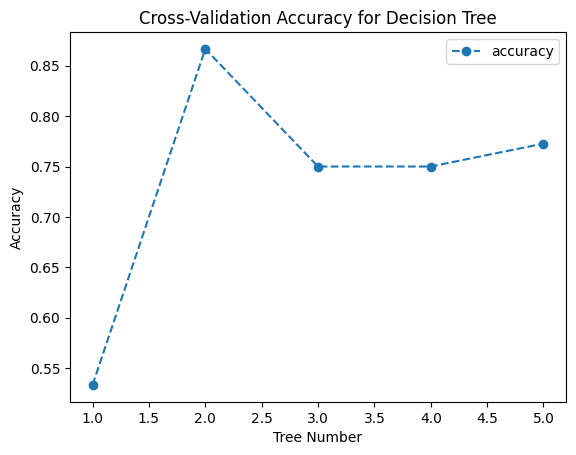

In [ ]:
# Create the DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# Perform cross-validation
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)

# Create a DataFrame to store the results
df = pd.DataFrame(data={"tree": range(1, 6), 'accuracy': scores})

# Plot the cross-validation results
df.plot(x='tree', y='accuracy', marker="o", linestyle='--')
plt.xlabel('Tree Number')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy for Decision Tree')
plt.show()


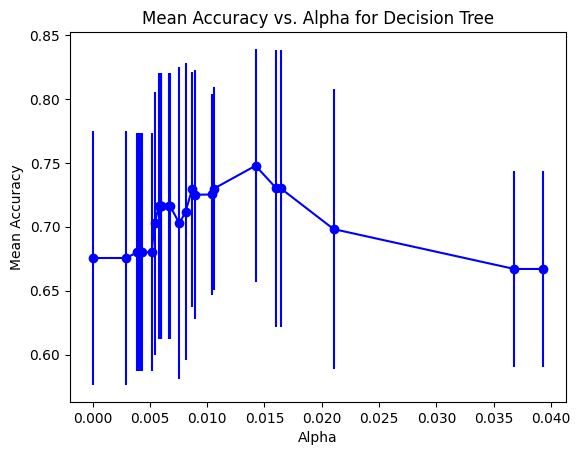

In [ ]:
 ## create an array to store the results of each fold during cross validiation alpha_loop_values = []
## For each candidate value for alpha, we will run 5-fold cross validation.
## Then we will store the mean and standard deviation of the scores (the accuracy) for each call
## to cross_val_score in alpha_loop_values...
# Store the results for different ccp_alpha values
alpha_loop_values = []

# Perform cross-validation for each ccp_alpha value
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

# Create a DataFrame to store the results
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

# Plot the means and standard deviations of the scores for each alpha
plt.errorbar(x=alpha_results['alpha'], y=alpha_results['mean_accuracy'],
             yerr=alpha_results['std'], marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Alpha for Decision Tree')
plt.show()



In [ ]:
alpha_results [(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [ ]:
ideal_ccp_alpha = alpha_results [(alpha_results['alpha'] > 0.014) &
(alpha_results['alpha'] < 0.015)]['alpha']

ideal_ccp_alpha


20    0.014225
Name: alpha, dtype: float64

In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha


0.014224751066856332

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned. fit(X_train, y_train)


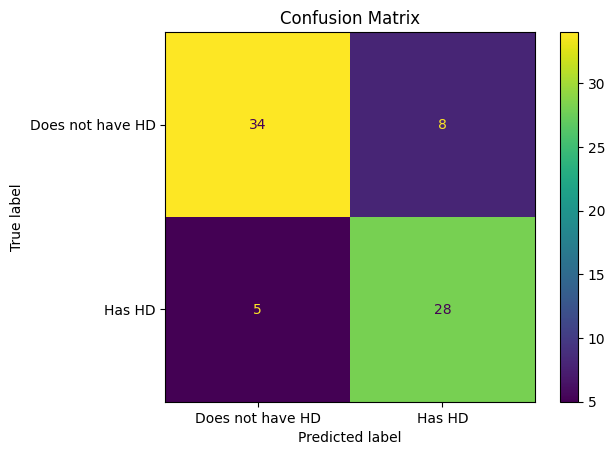

In [ ]:
# Make predictions on the test set
y_pred = clf_dt_pruned.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Does not have HD", "Has HD"])

# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()


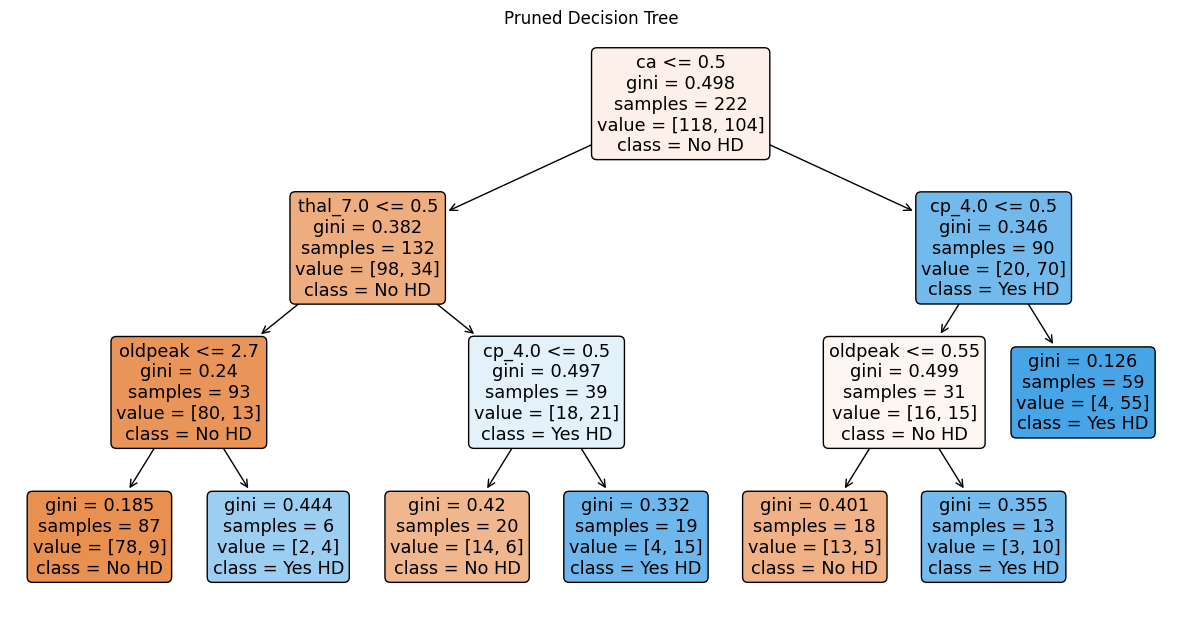

In [ ]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_encoded.columns.tolist())
plt.title('Pruned Decision Tree')
plt.show()





